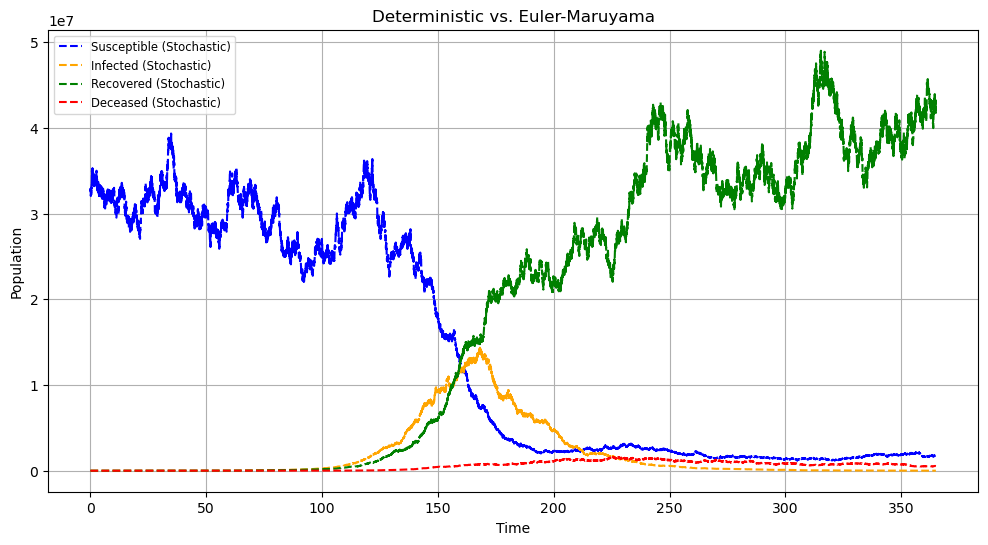

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# Model parameters.

T0 = 0
T = 365
n = 36500
dt = (T - T0) / n

lambda_val = 0.00000000424404

gamma = 0.0457600061

mu = 0.0019902810

sigma1 = 0.05
sigma2 = 0.05
sigma3 = 0.05
sigma4 = 0.05

initial_conditions = np.array([32625831, 116, 0, 1])

# Stochastic SIRD Model using Euler-Maruyama.

np.random.seed(100)
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)

dW = np.sqrt(dt) * np.random.randn(n, 4)

S[0] = 32625831
I[0] = 116
R[0] = 0
D[0] = 1

def f(S, I, R, D, lambda_val, gamma, mu):

    dS = -lambda_val * S * I
    dI = lambda_val * S * I - gamma * I - mu * I
    dR = gamma * I
    dD = mu * I

    return np.array([dS, dI, dR, dD])


def g(X, sigma1, sigma2, sigma3, sigma4):
    
    return np.array([[sigma1 * X[0], 0, 0, 0],
    [0, sigma2 * X[1], 0, 0],
    [0, 0, sigma3 * X[2], 0],
    [0, 0, 0, sigma4 * X[3]]])

for i in range (1, n):

# Euler-Maruyama.

    X = np.array([S[i - 1], I[i - 1], R[i - 1], D[i - 1]])
    dX = f(*X, lambda_val, gamma, mu) * dt + g(X, sigma1, sigma2, sigma3, sigma4).dot(dW[i,:])

    X_new = X + dX
    S[i], I[i], R[i], D[i] = X_new

# Plotting results.
plt.figure (figsize = (12, 6))

# Stochastic SIRD using Euler-Maruyama.

plt.plot(np.arange (0, T + dt, dt), [S[0]] + list (S), label = "Susceptible (Stochastic)", linestyle = "dashed", color = "blue")

plt.plot(np.arange(0, T + dt, dt), [I[0]] + list(I), label = "Infected (Stochastic)", linestyle = "dashed", color = "orange")

plt.plot(np.arange(0, T + dt, dt), [R[0]] + list(R), label = "Recovered (Stochastic)", linestyle = "dashed", color = "green")

plt.plot(np.arange(0, T + dt, dt), [D[0]] + list(D), label = "Deceased (Stochastic)", linestyle = "dashed", color = "red")

plt.legend(fontsize = "small")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Deterministic vs. Euler-Maruyama")

plt.show()

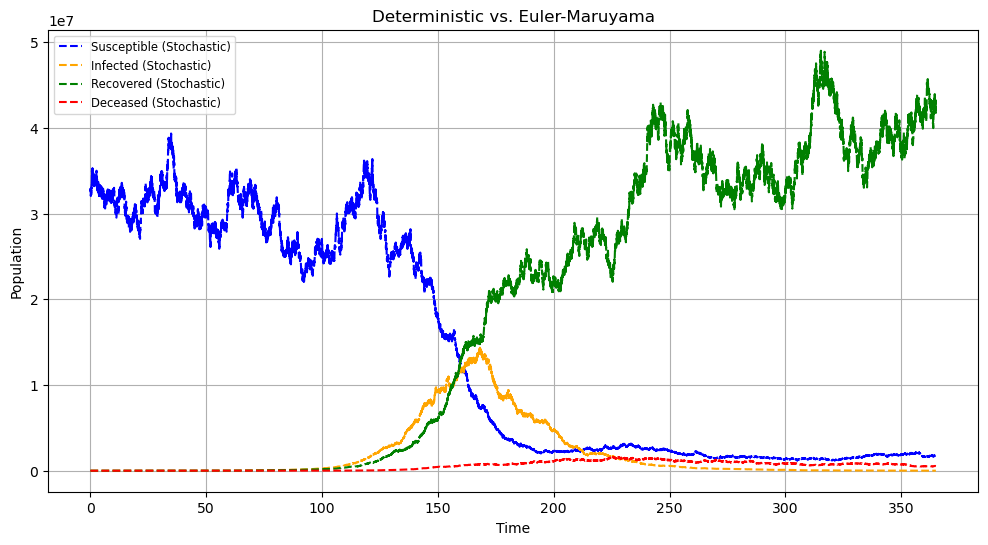

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Model parameters.

T0 = 0
T = 365
n = 36500
dt = (T - T0) / n

lambda_val = 0.00000000424404

gamma = 0.0457600061

mu = 0.0019902810

sigma1 = 0.05
sigma2 = 0.05
sigma3 = 0.05
sigma4 = 0.05

initial_conditions = np.array([32625831, 116, 0, 1])

# Stochastic SIRD Model using Euler-Maruyama.

np.random.seed(100)
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)

# dW = np.sqrt(dt) * np.random.randn(n, 4)
dW = np.random.normal(0, np.sqrt(dt), size=(n,4))


S[0] = 32625831
I[0] = 116
R[0] = 0
D[0] = 1

def f(S, I, R, D, lambda_val, gamma, mu):

    dS = -lambda_val * S * I
    dI = lambda_val * S * I - gamma * I - mu * I
    dR = gamma * I
    dD = mu * I

    return np.array([dS, dI, dR, dD])


def g(X, sigma1, sigma2, sigma3, sigma4):
    
    return np.array([   
        [sigma1 * X[0], 0, 0, 0],
        [0, sigma2 * X[1], 0, 0],
        [0, 0, sigma3 * X[2], 0],
        [0, 0, 0, sigma4 * X[3]]])

for i in range (1, n):

# Euler-Maruyama.

    X = np.array([S[i - 1], I[i - 1], R[i - 1], D[i - 1]])
    dX = f(*X, lambda_val, gamma, mu) * dt + g(X, sigma1, sigma2, sigma3, sigma4).dot(dW[i,:])

    X_new = X + dX
    S[i], I[i], R[i], D[i] = X_new

# Plotting results.
plt.figure (figsize = (12, 6))

# Stochastic SIRD using Euler-Maruyama.

plt.plot(np.arange (0, T + dt, dt), [S[0]] + list (S), label = "Susceptible (Stochastic)", linestyle = "dashed", color = "blue")

plt.plot(np.arange(0, T + dt, dt), [I[0]] + list(I), label = "Infected (Stochastic)", linestyle = "dashed", color = "orange")

plt.plot(np.arange(0, T + dt, dt), [R[0]] + list(R), label = "Recovered (Stochastic)", linestyle = "dashed", color = "green")

plt.plot(np.arange(0, T + dt, dt), [D[0]] + list(D), label = "Deceased (Stochastic)", linestyle = "dashed", color = "red")

plt.legend(fontsize = "small")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Deterministic vs. Euler-Maruyama")

plt.show()

In [32]:
# np.sqrt(dt) * np.random.randn(n, 4)

dW = np.random.normal(0, np.sqrt(dt), size=(n,4))
dW[1,:]

array([ 0.0008897 ,  0.00678139, -0.00296354, -0.05389477])

In [33]:
k = np.array([
    [sigma1 * X[0], 0, 0, 0],
    [0, sigma2 * X[1], 0, 0],
    [0, 0, sigma3 * X[2], 0],
    [0, 0, 0, sigma4 * X[3]]]).dot(dW[1,:])

j = np.array([
    [sigma1 * X[0], 0, 0, 0],
    [0, sigma2 * X[1], 0, 0],
    [0, 0, sigma3 * X[2], 0],
    [0, 0, 0, sigma4 * X[3]]]) @ dW[1,:]

k == j

array([ True,  True,  True,  True])

Text(0.5, 1.0, 'Deterministic vs. Euler-Maruyama')

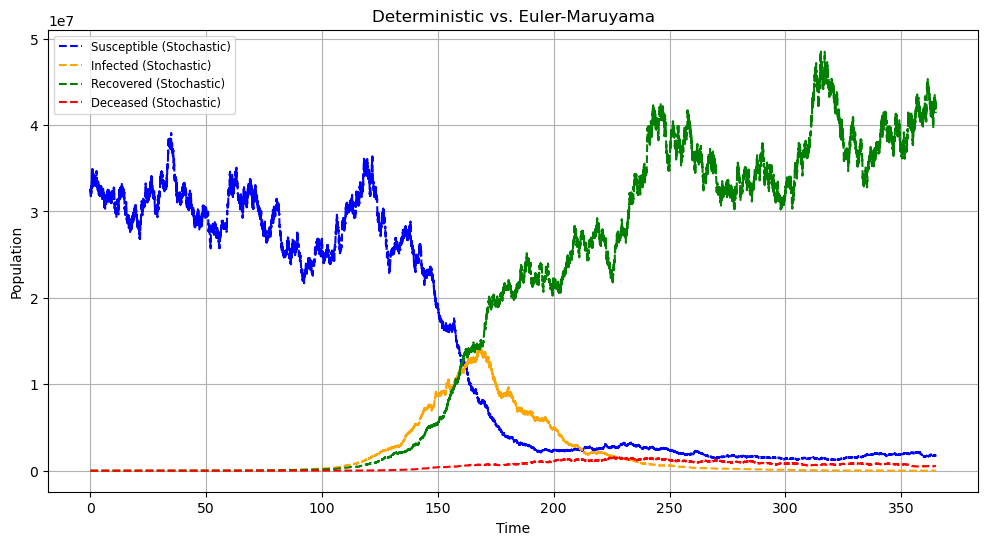

In [36]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 0
T = 365
n = 36500
dt = (T - T0) / n

lambda_val = 0.00000000424404

gamma = 0.0457600061

mu = 0.0019902810

sigma1 = 0.05
sigma2 = 0.05
sigma3 = 0.05
sigma4 = 0.05

np.random.seed(100)
S = np.zeros(n); I = np.zeros(n); R = np.zeros(n); D = np.zeros(n)
S[0] = 32625831; I[0] = 116; R[0] = 0; D[0] = 1

for i in range(n-1):

    S[i+1] = S[i] + ( -lambda_val * S[i] * I[i])*dt + sigma1*S[i]*np.random.normal(0, np.sqrt(dt))
    I[i+1] = I[i] + (lambda_val * S[i] * I[i] - gamma * I[i] - mu * I[i])*dt + sigma2*I[i]*np.random.normal(0, np.sqrt(dt))
    R[i+1] = R[i] + (gamma * I[i])*dt + sigma3*R[i]*np.random.normal(0, np.sqrt(dt))
    D[i+1] = D[i] + (mu * I[i])*dt + sigma4*D[i]*np.random.normal(0, np.sqrt(dt))


# Plotting results.
plt.figure (figsize = (12, 6))

# Stochastic SIRD using Euler-Maruyama.
plt.plot(np.arange (0, T, dt), S, label = "Susceptible (Stochastic)", linestyle = "dashed", color = "blue")
plt.plot(np.arange(0, T, dt), I, label = "Infected (Stochastic)", linestyle = "dashed", color = "orange")
plt.plot(np.arange(0, T, dt), R, label = "Recovered (Stochastic)", linestyle = "dashed", color = "green")
plt.plot(np.arange(0, T, dt), D, label = "Deceased (Stochastic)", linestyle = "dashed", color = "red")

plt.legend(fontsize = "small")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Deterministic vs. Euler-Maruyama")

